###  Create a Support Vector Machine regressor to predict wine quality from profile of chemical attributes of the wine.

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os
# from os import listdir
# from os.path import isfile, join
# from os import system
# from os.path import isfile, join

##### Example SciKit SVR Regressors

  + https://www.programcreek.com/python/example/75189/sklearn.svm.SVR
  + https://github.com/drabastomek/practicalDataAnalysisCookbook/tree/master/Codes/Chapter06
  + https://github.com/drabastomek/practicalDataAnalysisCookbook/blob/master/Codes/Chapter06/regression_svm_alternative.py

##### White wine source data set

In [2]:
# white_datafile = os.path.join("..", "data", "sourcedata", "winequality-white.csv")
# print(white_datafile)

# white_df = pd.read_csv(white_datafile, delimiter=";")
# white_df.sort_values(by=['pH'], ascending=True)

In [3]:
datafile = os.path.join("..", "data", "sourcedata", "winequality-red.csv")
print(datafile)

red_df = pd.read_csv(datafile, delimiter=";")
red_df.head()
red_df.sort_values(by=['quality'], ascending=False)

..\data\sourcedata\winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


In [4]:
wine_df = red_df

##### Set the target attribute (y axis)

In [5]:
y = wine_df["quality"].values.reshape(-1,1)
y
# Using SVM as a regression and NOT a clasifier so we won;t be declaring target class names 
# target_names = ["negative", "positive"]

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

###### drop the target (quality) column from data to have dataeframe of just the attributes we are regressing

In [6]:
X = wine_df.drop("quality", axis=1)
feature_names = X.columns
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


###### split the training and testing data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42345)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199, 1)
(400, 11)
(400, 1)


In [46]:
# sorted_y = np.sort(y_test, axis=0)[::-1]
# sorted_y


#### Scale the data

In [10]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [11]:
from sklearn.preprocessing import PowerTransformer
X_scaler = PowerTransformer(method='yeo-johnson').fit(X_train)
y_scaler = PowerTransformer(method='yeo-johnson').fit(y_train)

C:\Users\jimco\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [12]:
# from sklearn.preprocessing import QuantileTransformer
# X_scaler = QuantileTransformer(output_distribution='normal').fit(X_train)
# y_scaler = QuantileTransformer(output_distribution='normal').fit(y_train)

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
# y_scaler = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

In [14]:
# from sklearn.preprocessing import MaxAbsScaler
# X_scaler = MaxAbsScaler().fit(X_train)
# y_scaler = MaxAbsScaler().fit(y_train)

In [15]:
# from sklearn.preprocessing import RobustScaler
# X_scaler = RobustScaler(quantile_range=(25, 75)).fit(X_train)
# y_scaler = RobustScaler(quantile_range=(25, 75)).fit(y_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


#### plot the scaled data for a few feature attributes just to see

In [17]:
i=0;
for feature in feature_names :
    print(f"[{i}] {feature}")
    i = i+1
      

[0] fixed acidity
[1] volatile acidity
[2] citric acid
[3] residual sugar
[4] chlorides
[5] free sulfur dioxide
[6] total sulfur dioxide
[7] density
[8] pH
[9] sulphates
[10] alcohol


##### Fixed Aciidty vs Quality scaled data plot

-3.4493082498523706 -3.6083543746522144
2.65302097490888 2.81329804609135


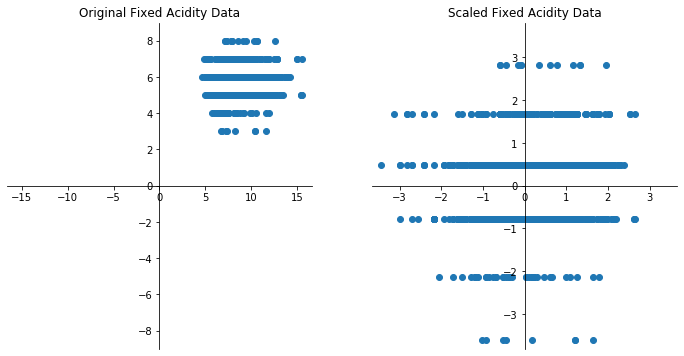

In [18]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Fixed Acidity Data")
axes2.set_title("Scaled Fixed Acidity Data")

maxx = X_train["fixed acidity"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx - 1, maxx + 1)
axes1.set_ylim(-maxy - 1, maxy + 1)

maxx_scaled = X_train_scaled[:,0].max()
minx_scaled = X_train_scaled[:,0].min()
maxy_scaled = y_train_scaled[:].max()
miny_scaled = y_train_scaled[:].min()

axes2.set_xlim(-maxx_scaled - 1, maxx_scaled + 1)
axes2.set_ylim(-maxy_scaled - 1, maxy_scaled + 1)

# axes2.set_xlim(-1.5, 1.5)
# axes2.set_ylim(-1.5, 1.5)

print(minx_scaled, miny_scaled)
print(maxx_scaled, maxy_scaled)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["fixed acidity"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

##### Alcohol vs Quality scaled data plot

14.0 8
-3.024008803504368 -3.6083543746522144
2.268966531016334 2.81329804609135


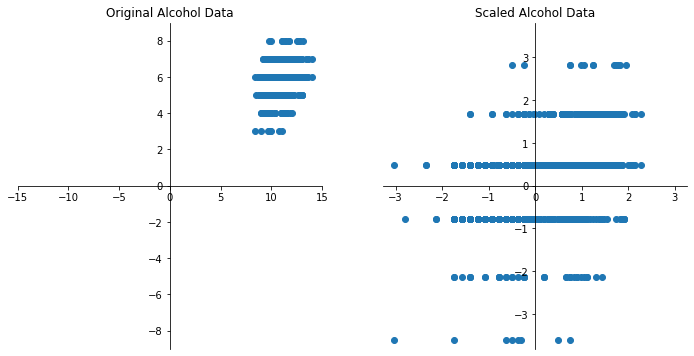

In [19]:
fig2 = plt.figure(figsize=(12, 6))
axes21 = fig2.add_subplot(1, 2, 1)
axes22 = fig2.add_subplot(1, 2, 2)

axes21.set_title("Original Alcohol Data")
axes22.set_title("Scaled Alcohol Data")

maxx = X_train["alcohol"].max()
maxy = y_train.max()
print(maxx, maxy)
axes21.set_xlim(-maxx - 1, maxx + 1)
axes21.set_ylim(-maxy - 1, maxy + 1)

# axes22.set_xlim(-9, 9)
# axes22.set_ylim(-9, 9)

maxx_scaled = X_train_scaled[:,10].max()
minx_scaled = X_train_scaled[:,10].min()
maxy_scaled = y_train_scaled[:].max()
miny_scaled = y_train_scaled[:].min()

axes22.set_xlim(-maxx_scaled - 1, maxx_scaled + 1)
axes22.set_ylim(-maxy_scaled - 1, maxy_scaled + 1)

print(minx_scaled, miny_scaled)
print(maxx_scaled, maxy_scaled)
    
set_axes(axes21)
set_axes(axes22)

axes21.scatter(X_train["alcohol"], y_train)
axes22.scatter(X_train_scaled[:,10], y_train_scaled[:])

##### Citrc Acid vs Quality scaled data plot

-1.5383574154118451 -3.6083543746522144
2.823969806550013 2.81329804609135


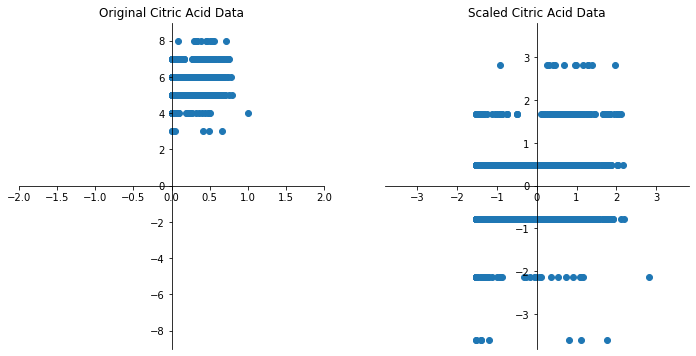

In [20]:
fig3 = plt.figure(figsize=(12, 6))
axes31 = fig3.add_subplot(1, 2, 1)
axes32 = fig3.add_subplot(1, 2, 2)

axes31.set_title("Original Citric Acid Data")
axes32.set_title("Scaled Citric Acid Data")

maxx = X_train["citric acid"].max()
maxy = y_train.max()
axes31.set_xlim(-maxx - 1, maxx + 1)
axes31.set_ylim(-maxy - 1, maxy + 1)

# axes32.set_xlim(-7, 7)
# axes32.set_ylim(-7, 7)

maxx_scaled = X_train_scaled[:,2].max()
minx_scaled = X_train_scaled[:,2].min()
maxy_scaled = y_train_scaled[:].max()
miny_scaled = y_train_scaled[:].min()

axes32.set_xlim(-maxx_scaled - 1, maxx_scaled + 1)
axes32.set_ylim(-maxy_scaled - 1, maxy_scaled + 1)

print(minx_scaled, miny_scaled)
print(maxx_scaled, maxy_scaled)

set_axes(axes31)
set_axes(axes32)

axes31.scatter(X_train["citric acid"], y_train)
axes32.scatter(X_train_scaled[:,2], y_train_scaled[:])

##### Residual Sugar vs Quality scaled data plot

-5.285852677086235 -3.6083543746522144
2.5058655533666694 2.81329804609135


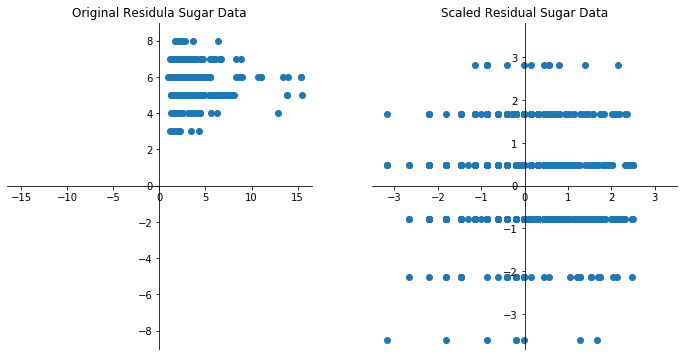

In [21]:
fig4 = plt.figure(figsize=(12, 6))
axes41 = fig4.add_subplot(1, 2, 1)
axes42 = fig4.add_subplot(1, 2, 2)

axes41.set_title("Original Residula Sugar Data")
axes42.set_title("Scaled Residual Sugar Data")

maxx = X_train["residual sugar"].max()
maxy = y_train.max()
axes41.set_xlim(-maxx - 1, maxx + 1)
axes41.set_ylim(-maxy - 1, maxy + 1)

# axes42.set_xlim(-7, 7)
# axes42.set_ylim(-7, 7)

maxx_scaled = X_train_scaled[:,3].max()
minx_scaled = X_train_scaled[:,3].min()
maxy_scaled = y_train_scaled[:].max()
miny_scaled = y_train_scaled[:].min()

axes42.set_xlim(-maxx_scaled - 1, maxx_scaled + 1)
axes42.set_ylim(-maxy_scaled - 1, maxy_scaled + 1)

print(minx_scaled, miny_scaled)
print(maxx_scaled, maxy_scaled)
    
set_axes(axes41)
set_axes(axes42)

axes41.scatter(X_train["residual sugar"], y_train)
axes42.scatter(X_train_scaled[:,3], y_train_scaled[:])

### Train (fit) various regression models

In [22]:
# # Support vector machine linear classifier
# # from sklearn.svm import SVC 
# # model = SVC(kernel='linear')

# #from sklearn.svm import SVR
# # model = SVR(kernel='rbf', C=0.1 * logC, gamma=0.1 * logGamma)
# # model = SVR(kernel='rbf', C=0.1, gamma=0.1) ## R2 = 0.13
# model = SVR() ## R2 = 0.38, MSE = 0.60
# #model = SVR(kernel='linear') ## R2 = 0.25, MSE = 0.58
# #model = LinearRegression() ## R2 = 0.27, MSE = 0.56
# model.fit(X_train_scaled, np.ravel(y_train_scaled))

In [23]:
#np.ravel(y_train_scaled).shape

##### Use  model metrics appropriate for Regression Models
  + note - "accuracy" is for classifiers 
  + need different metrics for a regressor
  + r-squared is default scoring for many sklearn modles (results of model.score)
  + mean-squared error (MSE).  
  + Good MSE is close to 0.  Good R2 is close to 1

In [24]:
# model.score(X_test_scaled, y_test_scaled)

In [25]:
# # Score the prediction with mse and r2
# predicted_scaled = model.predict(X_test_scaled)

# mse = mean_squared_error(y_test_scaled, predicted_scaled)
# r2 = r2_score(y_test_scaled, predicted_scaled)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")

#### Try different models out using DABC Week 21, Day 1,  Acivity 08 solved as example

##### SVR Model

In [43]:
# SVR
# Note: Use an alpha of .01 when creating the model for this activity
#from sklearn.linear_model import SVR

svr = SVR(gamma='auto')
svr.fit(X_train_scaled, np.ravel(y_train_scaled))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [44]:
predictions = svr.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = svr.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6476821937174481, R2: 0.4117988461132651


##### Linear Regression Model

In [28]:
# Linear Regression Model
# LinearRegression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predictions = lr.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lr.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6371906303821627, R2: 0.4213268981729805


##### Lasso model

In [30]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6419622914496373, R2: 0.41699345103938623


##### Ridge model

In [32]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01)
ridge.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6371911802176988, R2: 0.4213263988325634


##### ElasticNet model

In [34]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6393414136670909, R2: 0.41937363587516463


##### Gaussian Process Regressor

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor

gpr = GaussianProcessRegressor(alpha=0.1)
gpr.fit(X_train_scaled, y_train_scaled)

GaussianProcessRegressor(alpha=0.1, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [37]:
predictions = gpr.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = gpr.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.642854192212542, R2: 0.41618345956056874


### Inverse scale the predicitions for presentation to user 

In [45]:
predict_df = pd.DataFrame()

#print(predictions)
print(predictions.shape)

shaped_preds = predictions.reshape(-1,1)
print(shaped_preds.shape)

inverse_scale_preds = y_scaler.inverse_transform(shaped_preds)
#print(inverse_scale_preds.shape)

      
##predict_df['predictions'] = y_scaler.inverse_transform(predictions).flatten()
predict_df['predictions'] = inverse_scale_preds.flatten()
predict_df['y_test'] = y_test

print(predict_df.shape)

predict_df.sort_values(by='y_test', ascending=False)
#y_scaler.inverse_transform(predictions).flatten()

(400,)
(400, 1)
(400, 2)


,predictions,y_test
285,5.528461,8
186,6.688286,8
21,6.627805,8
294,6.472345,8
355,6.345234,8
...,...,...
322,5.528321,4
166,5.319760,4
120,5.459000,4
336,5.068431,3


###### test making some of the predictions

In [39]:
# predictions = model.predict(X_test)

# results_df = pd.DataFrame(data=X_test)

# type(predictions)

In [40]:
# results_df = pd.DataFrame(data=X_test)
# results_df['q2'] = y_test
# results_df['predictions'] = predictions
# results_df.head(30)